In [1]:
import os
os.getcwd()

'C:\\Users\\a1964\\Desktop\\EECS4080\\database\\test'

In [2]:
import tensorflow as tf

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
import pandas as pd
import numpy as np
import ast  
from keras.utils import pad_sequences


from keras.models import Model
from keras.layers import Input, LSTM,Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load the csv file from the disk
df = pd.read_csv('tokenized_dataset.csv')
train_data = df['tokenized_id']
file_names = df['file']
NUM_ROWS= len(train_data)

In [5]:
#The following code read dataset and find the respected labels, and integrating everything together as numpy arrays
#The input_data_3d is the dataset and the label_data_3d is the respected labels
iteration = 0
pedvalue = 1.0
framenumber=75
targetlength = int(framenumber*155*3)

while iteration < NUM_ROWS:
    if iteration == 0:

        train_data1 = train_data[iteration]
        sample_list = ast.literal_eval(train_data1)
        sample_list = np.array(sample_list)
        

        
        sample_list = np.reshape(sample_list, (1, -1))
        


        sample_list = pad_sequences(sample_list, maxlen=int(targetlength/framenumber), padding='post', truncating='post',dtype='float64',value=pedvalue)


        #sample_list = np.reshape(sample_list, (1, -1))


        #------------------------------------------------
        file_path = file_names[iteration]
        train_label_path =  file_path.replace('.mp4', '.pose_data.json_combined.npy')

        train_labels = np.load(train_label_path)

        train_labels = np.reshape(train_labels, (1, -1))
        train_labels = pad_sequences(train_labels, maxlen=targetlength, padding='post', truncating='post',dtype='float64',value=pedvalue)
        
        input_data_expanded = np.tile(sample_list, (1, framenumber))

        input_data_3d = input_data_expanded.reshape((1, framenumber, -1))  # 60帧，每帧的元素数自动计算
        label_data_3d = train_labels.reshape((1, framenumber, -1))

        iteration = iteration + 1
    else:

        train_dataO = train_data[iteration]
        sample_listO = ast.literal_eval(train_dataO)
        sample_listO = np.array(sample_listO)
        sample_listO = np.reshape(sample_listO, (1, -1))


        sample_listO = pad_sequences(sample_listO, maxlen=int(targetlength/framenumber), padding='post', truncating='post',dtype='float64',value=pedvalue)

        
        


        file_path = file_names[iteration]
        train_label_path =  file_path.replace('.mp4', '.pose_data.json_combined.npy')

        train_labelsO = np.load(train_label_path)
        train_labelsO = np.reshape(train_labelsO, (1, -1))
        train_labelsO = pad_sequences(train_labelsO, maxlen=targetlength, padding='post', truncating='post',dtype='float64',value=pedvalue)
        
        input_data_expandedO = np.tile(sample_listO, (1, framenumber))

        input_data_3dO = input_data_expandedO.reshape((1, framenumber, -1))  
        label_data_3dO = train_labelsO.reshape((1, framenumber, -1))


        input_data_3d = np.vstack([input_data_3d,input_data_3dO])
        label_data_3d = np.vstack([label_data_3d,label_data_3dO])
        #print(input_data_3dO.shape)
        #print(label_data_3dO.shape)

#        print(train_labels.shape)
        
        iteration = iteration + 1
print("-------------dataset loaded-------------")
print(input_data_3d.shape)
print(label_data_3d.shape)

-------------dataset loaded-------------
(1206, 75, 465)
(1206, 75, 465)


In [6]:
#split into training set and dev set
input_data_3d, test_sample_list, label_data_3d, test_labels = train_test_split(input_data_3d, label_data_3d, test_size=0.2, random_state=42,shuffle=True, stratify=None)

In [7]:
input_data_3d.shape

(964, 75, 465)

In [8]:
test_sample_list.shape

(242, 75, 465)

In [10]:
# Define encoder
encoder_inputs = Input(shape=(None, input_data_3d.shape[2]), dtype='float64')
encoder = LSTM(units=1024, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

# Define decoder
decoder_inputs = Input(shape=(None, label_data_3d.shape[2]), dtype='float64')
decoder_lstm = LSTM(units=1024, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
decoder_dense = Dense(units=label_data_3d.shape[2], activation='linear', dtype='float64')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
# compile it 
model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['mae'])



Epoch 1/50
49/49 [==============================] - 4s 85ms/step - loss: 0.0142 - mae: 0.0142 - val_loss: 0.0161 - val_mae: 0.0161
Epoch 2/50
49/49 [==============================] - 4s 85ms/step - loss: 0.0140 - mae: 0.0140 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 3/50
49/49 [==============================] - 4s 89ms/step - loss: 0.0132 - mae: 0.0132 - val_loss: 0.0153 - val_mae: 0.0153
Epoch 4/50
49/49 [==============================] - 5s 93ms/step - loss: 0.0133 - mae: 0.0133 - val_loss: 0.0127 - val_mae: 0.0127
Epoch 5/50
49/49 [==============================] - 5s 95ms/step - loss: 0.0121 - mae: 0.0121 - val_loss: 0.0117 - val_mae: 0.0117
Epoch 6/50
49/49 [==============================] - 5s 95ms/step - loss: 0.0120 - mae: 0.0120 - val_loss: 0.0118 - val_mae: 0.0118
Epoch 7/50
49/49 [==============================] - 5s 96ms/step - loss: 0.0115 - mae: 0.0115 - val_loss: 0.0108 - val_mae: 0.0108
Epoch 8/50
49/49 [==============================] - 5s 96ms/step - loss: 0.0109 - m

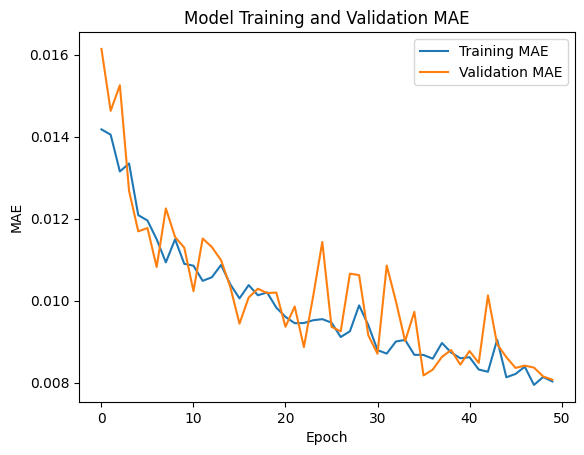

In [13]:
history = model.fit(
    x=[input_data_3d, label_data_3d[:, :-1, :]],
    y=label_data_3d[:, 1:, :],
    epochs=50,
    batch_size=20,
    validation_data=([test_sample_list, test_labels[:, :-1, :]], test_labels[:, 1:, :])
)
#plt.plot(history.history['mae'])
#plt.title('Model Training mae')
#plt.ylabel('mae')
#plt.xlabel('Epoch')
#plt.show()
#both the mae/mse on the training part and the validation part
train_loss = history.history['mae']
val_loss = history.history['val_loss']  # 使用val_loss获取验证损失

# draw the line of losses on the training set and the validation set
plt.plot(train_loss, label='Training MAE')
plt.plot(val_loss, label='Validation MAE')
plt.title('Model Training and Validation MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
model.save('encoder_decoder_full_model_LSTM.h5')